# Task 2:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [7]:
def get_speckle(Nq, depth, Nsamples, flip, Dtheta, seed):
    '''
    This routine get the speckle-like array from
    a modification of the provided Julia routine.
        
    Nq       # Number of qubits
    depth    # Number of random layers
    Nsamples # Number of samples
    flip     # Allow one random flip at circuit  1="on" / 0="off"
    Dtheta   # Shift in theta of two-qubit gate
    seed     # seed for random numbers
    '''
    # Run
    !julia run_random_circuit_T2.jl {Nq} {depth} {Nsamples} {flip} {Dtheta} {seed}

    # Import samples
    samples=np.load('samples.npy').tolist()

    # Build all posible configurations
    combos = itertools.product([0, 1], repeat=Nq)
    config = [list(c) for c in combos]

    # Count the number of each configuration and normalize
    speckle=[]
    for i in range(len(config)):
        it=0
        for k in range(len(samples)):
            if config[i]==samples[k]:it=it+1
        speckle.append(it)
    speckle=speckle/np.sum(speckle)
    return speckle

def plot_speckle(pattern_array):
    '''
    This function plots the speckle pattern
    '''
    plt.subplots(figsize=(15, 2))
    N = len(pattern_array)
    x = np.linspace(1,N,N)
    y = np.ones(N)
    colors = pattern_array
    area = 3000*pattern_array # 0 to 15 point radii
    plt.grid(False)
    plt.yticks([])
    plt.xticks(list(range(1, N+1)))
    plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='gray',vmin = 0, vmax = 1)
    #plt.colorbar()
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.show()  

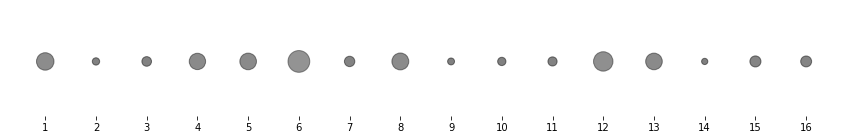

In [8]:
# Example without noise
Nq = 4           # Number of qubits
depth = 100      # Number of random layers
Nsamples = 1000  # Number of samples
flip = 1         # allow random flips  (1,0)=("on","off")
Dtheta = 0.0     # shift in Theta angle of two-qubit gate
seed = 17        # seed for random numbers
#
speckle=get_speckle(Nq, depth, Nsamples, flip, Dtheta, seed)
plot_speckle(speckle)

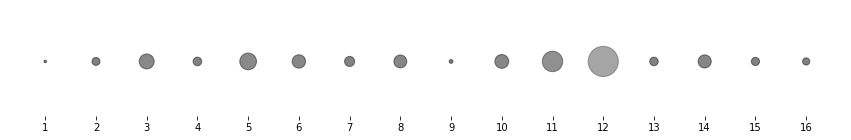

In [9]:
# Example without noise
Nq = 4           # Number of qubits
depth = 1000      # Number of random layers
Nsamples = 100000  # Number of samples
flip = 1         # allow random flips  (1,0)=("on","off")
Dtheta = 0.0     # shift in Theta angle of two-qubit gate
seed = 137       # seed for random numbers
#
speckle=get_speckle(Nq, depth, Nsamples, flip, Dtheta, seed)
plot_speckle(speckle)

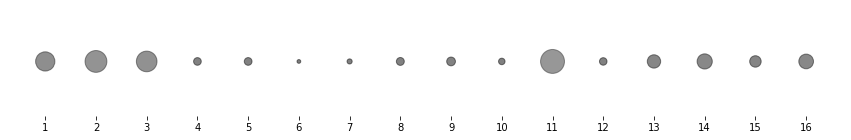

In [10]:
# Example without noise
Nq = 4           # Number of qubits
depth = 1000        # Number of random layers
Nsamples = 100000    # Number of samples
flip = 1         # allow random flips  (1,0)=("on","off")
Dtheta = 0.0     # shift in Theta angle of two-qubit gate
seed = 537       # seed for random numbers
#
speckle=get_speckle(Nq, depth, Nsamples, flip, Dtheta, seed)
plot_speckle(speckle)

<b>Quantum Vision:</b>  Inés Corte, Federico Holik, Marcelo Losada, Lorena Rebón, and Diego Tielas.